Analyse the sequence of pos and velo of 10000 ions in a short period with small steps

In [114]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
start = 547.126 #us
dt = 9.022389064166401e-03 #us
dir_name = "../data_cache/10000/traj/flat_28"
Nt = len(list(os.listdir(dir_name+"/r")))
t_ls = np.arange(1, Nt+1)*dt + start
print(np.min(t_ls), np.max(t_ls))
def load_traj(ion_id=0):
    traj_r = np.zeros((Nt, 3))
    traj_v = np.zeros((Nt, 3))
    for t in range(Nt):
        rt = np.load(dir_name+"/r/%.3fus.npy"%t_ls[t])
        vt = np.load(dir_name+"/v/%.3fus.npy"%t_ls[t])
        traj_r[t] = rt[ion_id]
        traj_v[t] = vt[ion_id]
    return traj_r, traj_v

label_list = ['x', 'y', 'z']

def analyse(axis, mode='r', ion_id=0):
    traj_r, traj_v = load_traj(ion_id)
    fig, ax = plt.subplots(figsize=(20, 10))
    if mode == 'r':
        ax.plot(t_ls, traj_r[:, axis])
        ax.set_xlabel("t/us")
        ax.set_ylabel("%s/um"%label_list[axis])
    elif mode == 'v':
        ax.plot(t_ls, traj_v[:, axis])
        ax.set_xlabel("t/us")
        ax.set_ylabel("v%s/(m/s)"%label_list[axis])
    plt.show()

def analyse_freq(axis, mode='r', ion_id=0, plot=True):
    traj_r, traj_v = load_traj(ion_id)
    Dt = dt
    fs = 1/Dt # Sampling frequency
    seq = traj_r[:, axis] if mode =='r' else traj_v[:, axis]
    freq = np.fft.fft(seq)
    Ns = len(freq)
    freqs = np.fft.fftfreq(Ns, 1/fs)  # 频率轴
    magnitude = np.abs(freq) / Ns  # 幅度谱（归一化）

    # 只绘制正频率部分
    half_Ns = Ns // 2
    freqs = freqs[:half_Ns]
    magnitude = magnitude[:half_Ns]

    # peaks, _ = find_peaks(freqs, height=0.0005)
    # print("Motional frequency:", freqs[peaks])
    # mag_max = np.max(magnitude[np.where(freqs>10)])
    # print(freqs[np.where(magnitude==mag_max)])

    if plot:
        # 绘制时域信号
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(t_ls, seq)
        plt.title("Signal")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")

        # 绘制频域幅度谱
        plt.subplot(2, 1, 2)
        plt.stem(freqs, magnitude, basefmt=" ")
        plt.title("Freq spectral")
        plt.xlabel("Freq (MHz)")
        plt.ylabel("Amplitude")
        # plt.xticks(np.arange(0, 100, 10))
        # plt.xticks(np.arange(-100, 110, 10))
        # plt.gca().xaxis.set_minor_locator(MultipleLocator(5))
        plt.grid(True, which='major', linestyle='-', color='gray', alpha=0.7)  # 主刻度网格
        plt.grid(True, which='minor', linestyle=':', color='lightgray', alpha=0.5)  # 次刻度网格

        plt.tight_layout()
        plt.show()

    return freqs, magnitude

def freq_segment(axis=0, ion_id=0, min_freq=0, max_freq=100):
    freqs, magnitude = analyse_freq(axis=axis, mode='v', ion_id=ion_id, plot=False) # defaut mode='v', as no low frequency bias
    mask = (freqs >= min_freq) & (freqs <= max_freq)
    freqs_low = freqs[mask]
    magnitude_low = magnitude[mask]
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(freqs_low, magnitude_low)
    ax.set_xlabel("freq/MHz")
    ax.set_ylabel("amplitude")
    ax.set_title("%s direction, %dth ion"%(label_list[axis], ion_id))
    plt.show()
print(Nt)

547.1350223890641 649.5301158782886
11350


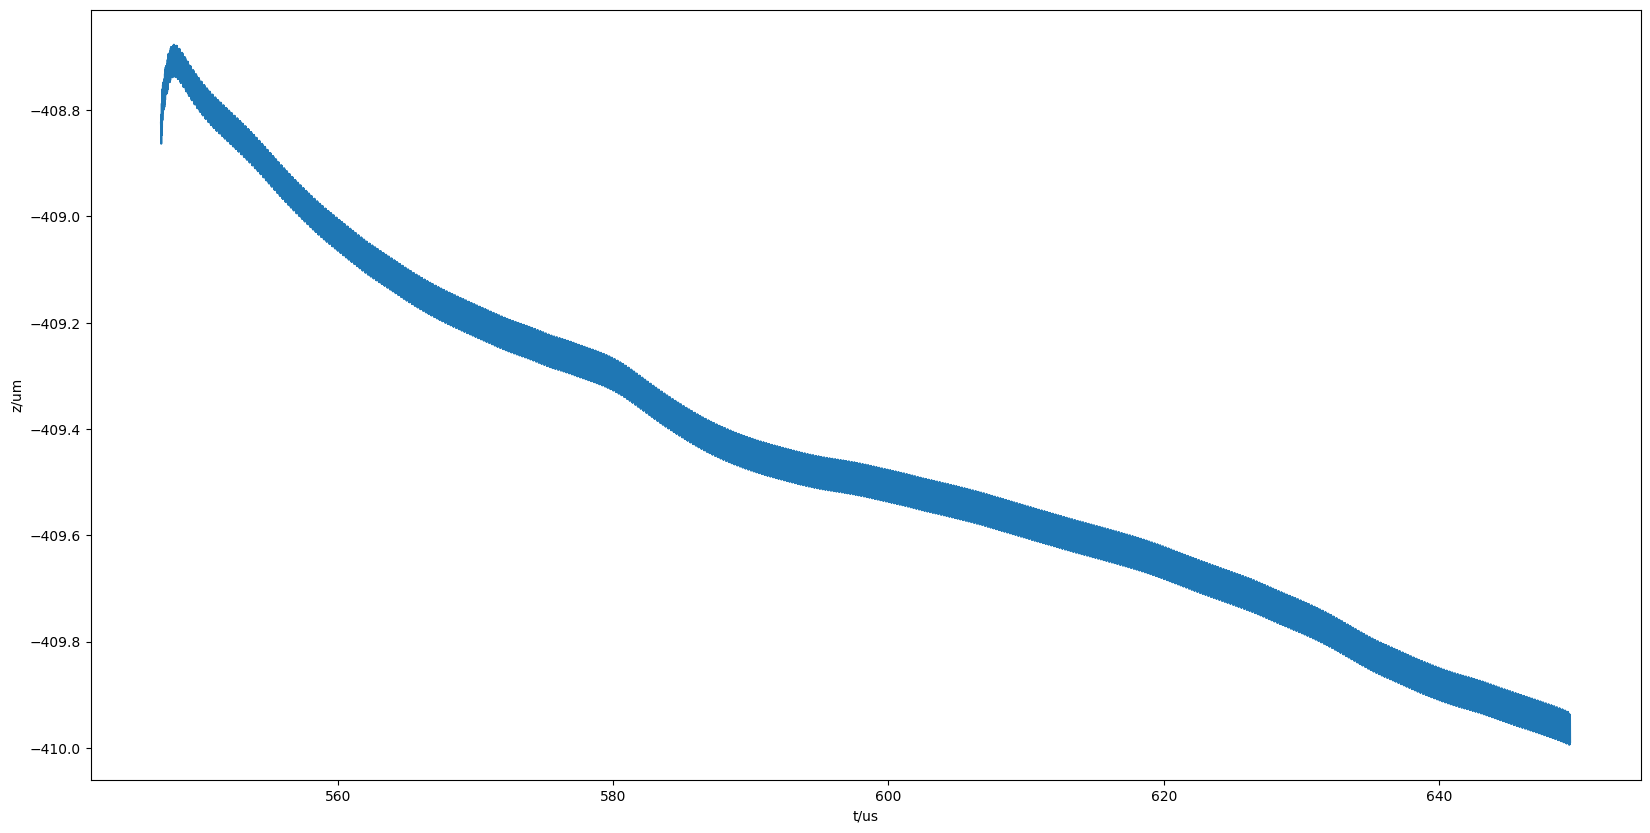

In [78]:
analyse(axis=2, mode='r', ion_id=4)

Motional frequency: []
[35.281785]


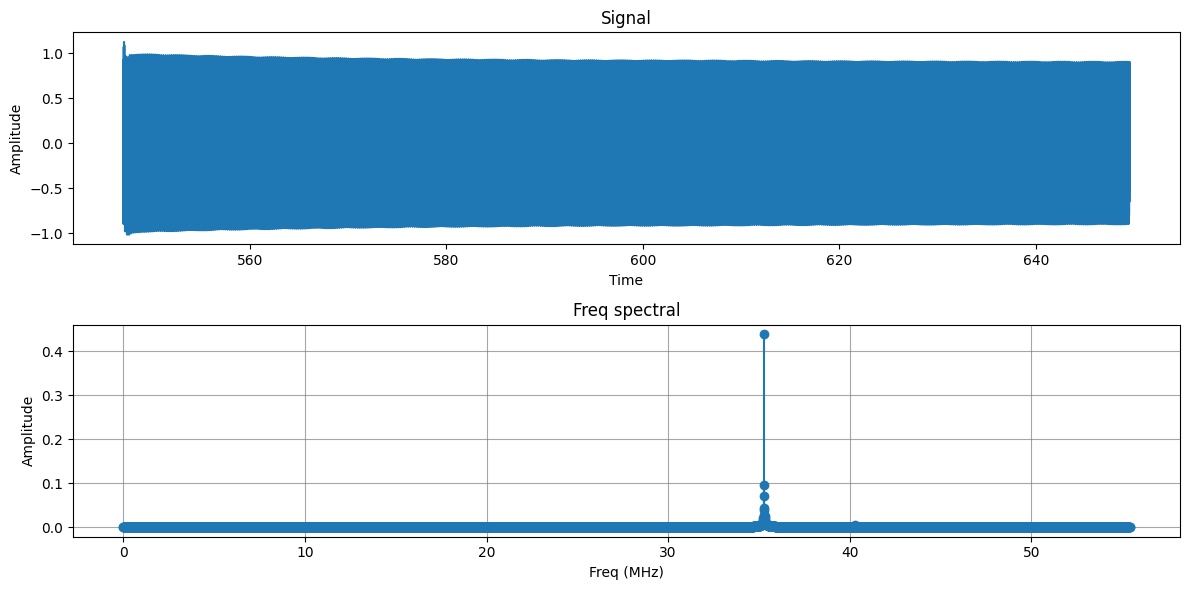

In [82]:
freqs, magnitude = analyse_freq(1, 'v', 3)

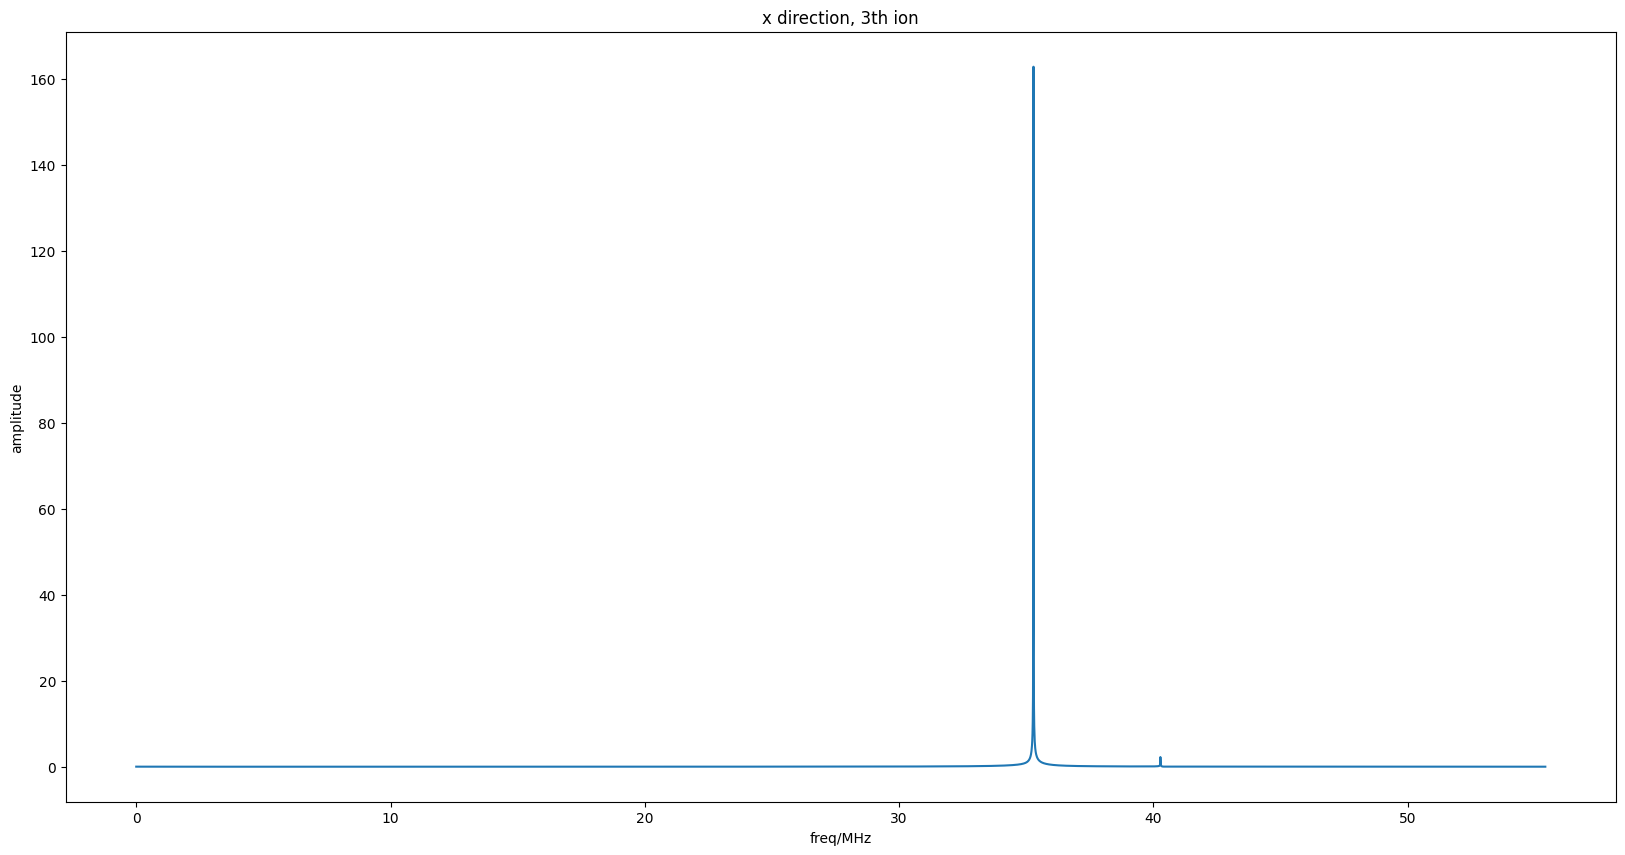

In [115]:
freq_segment(axis=0, ion_id=3)

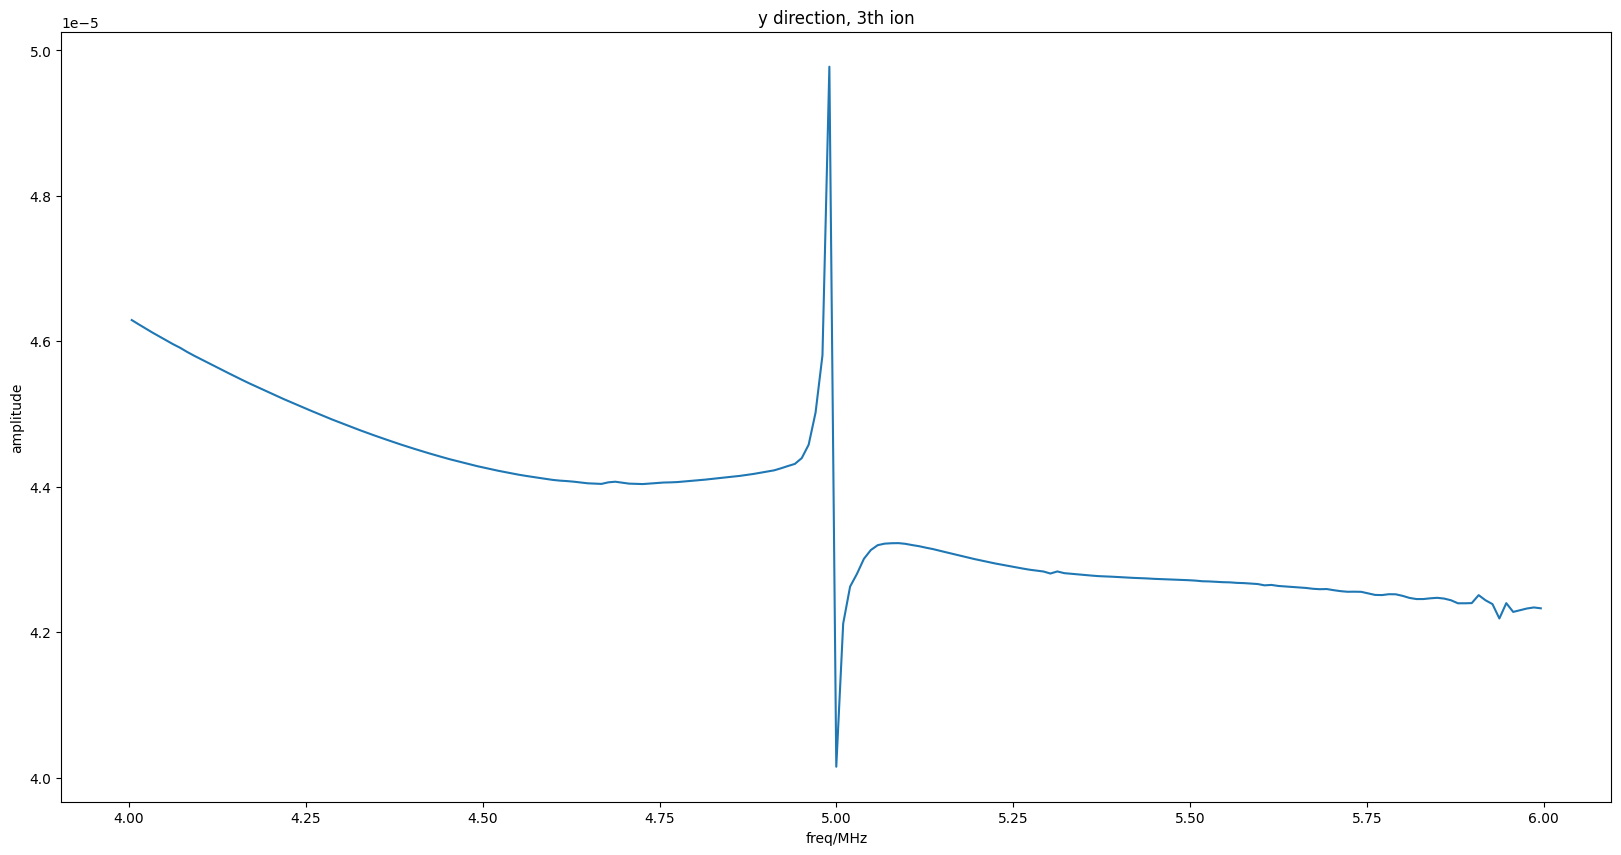

In [116]:
freq_segment(axis=1, ion_id=3, min_freq=4, max_freq=6)

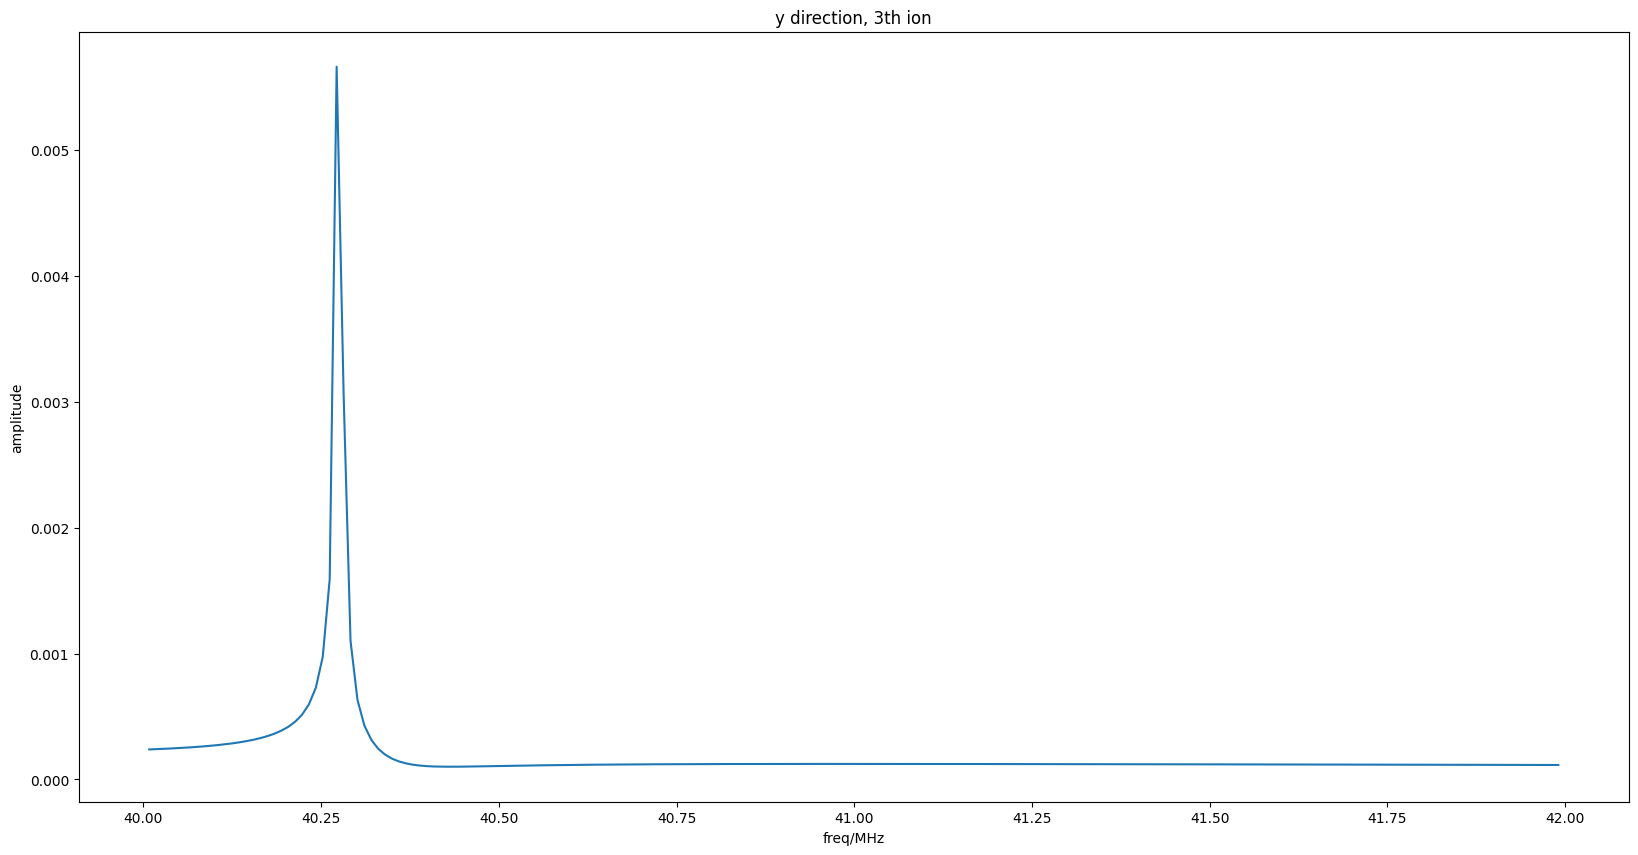

In [117]:
freq_segment(axis=1, ion_id=3, min_freq=40, max_freq=42)

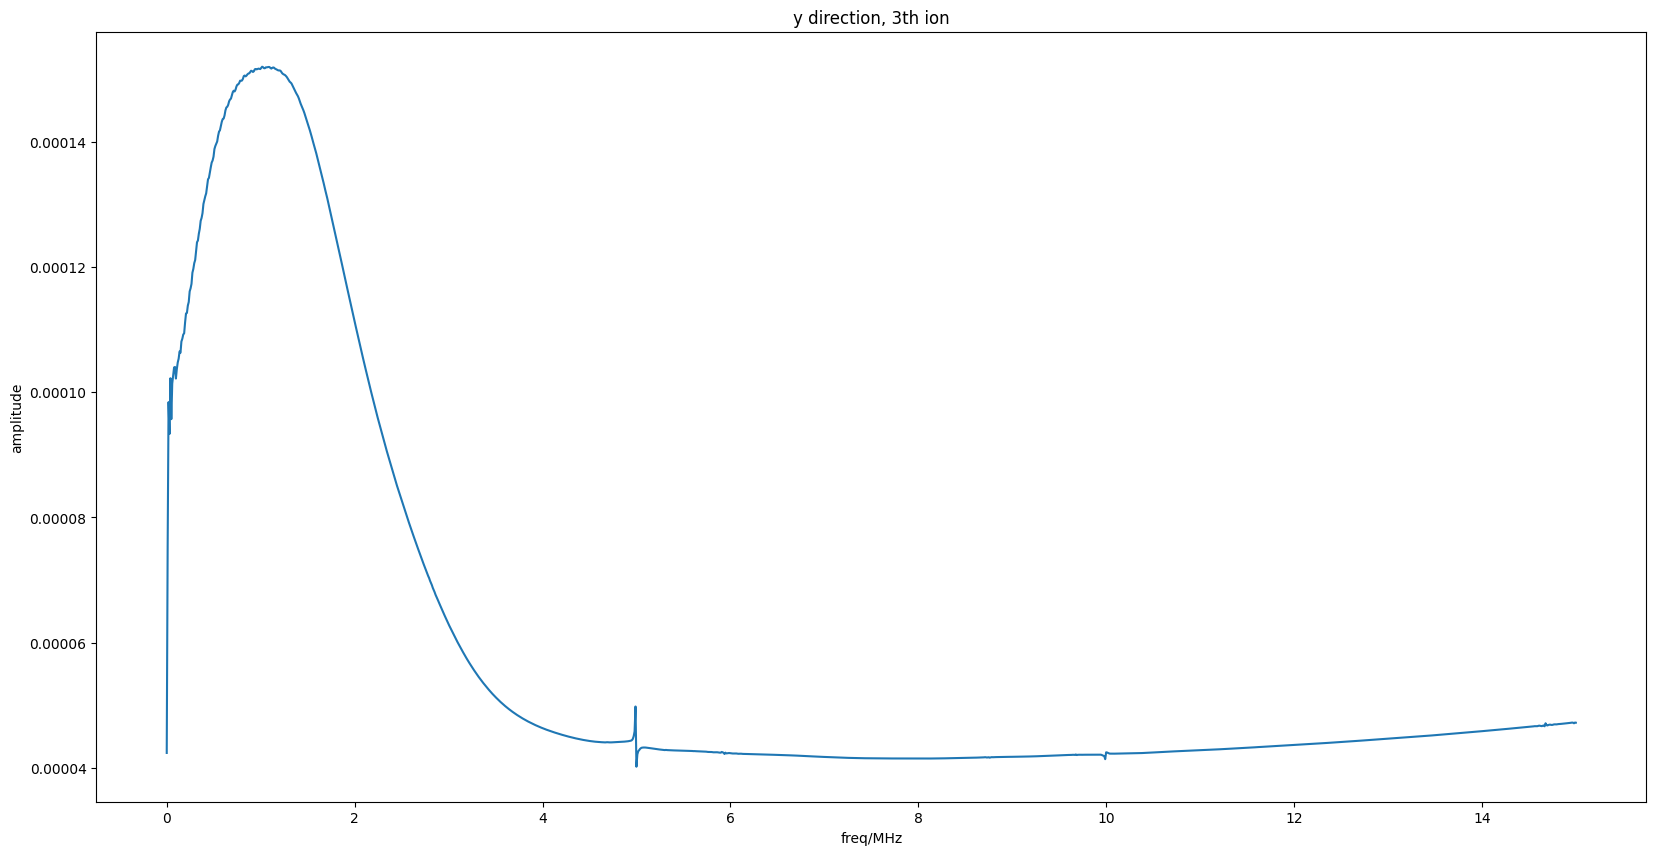

In [118]:
freq_segment(axis=1, ion_id=3, min_freq=0, max_freq=15)

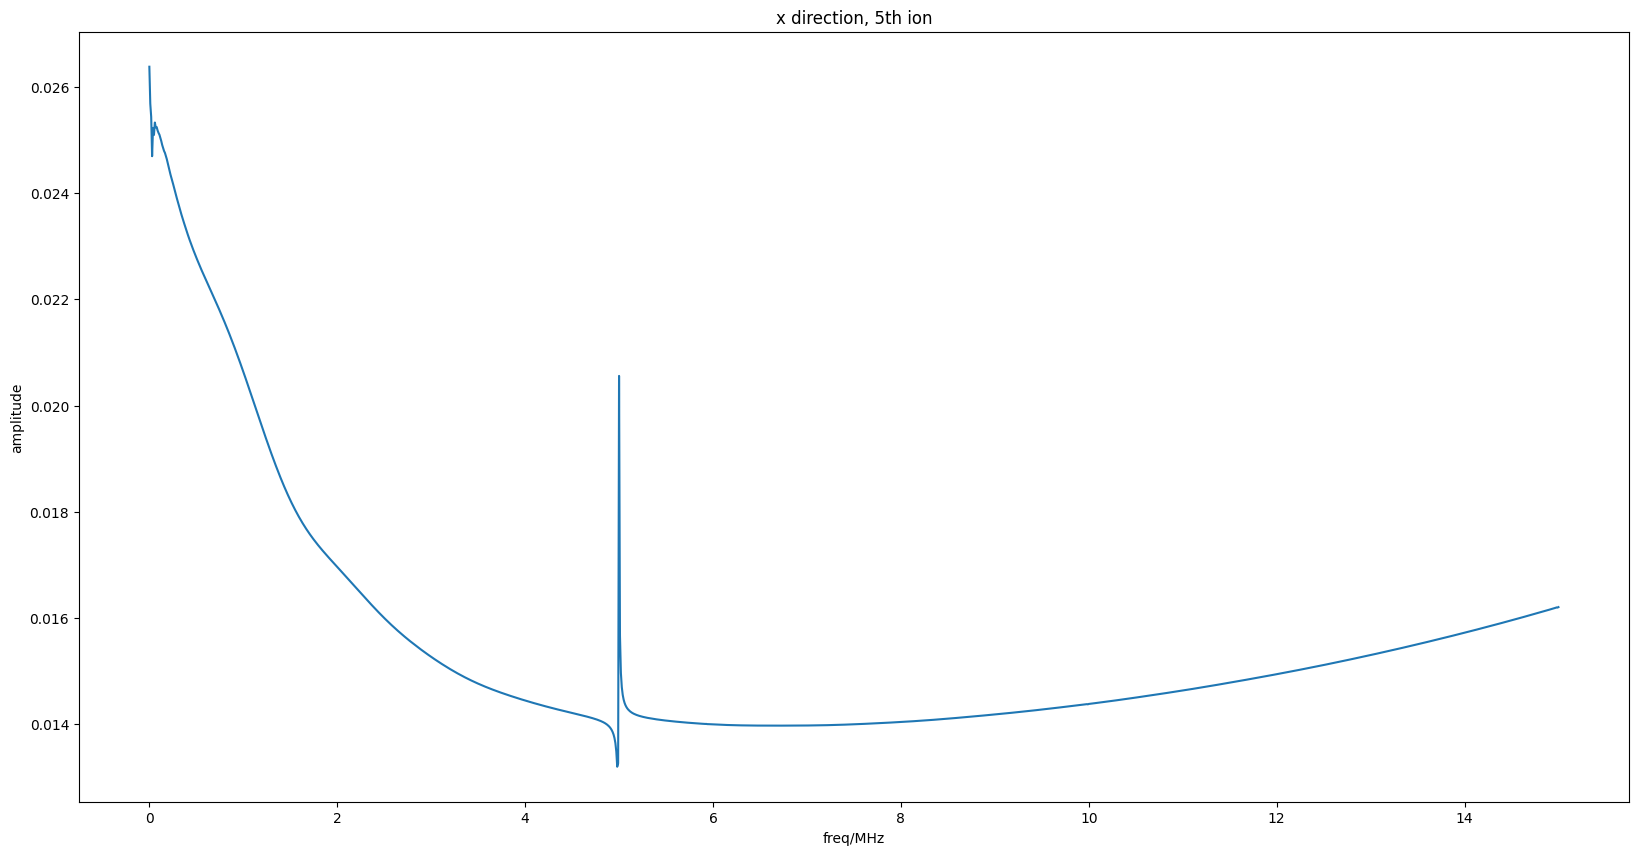

In [119]:
freq_segment(axis=0, ion_id=5, min_freq=0, max_freq=15)

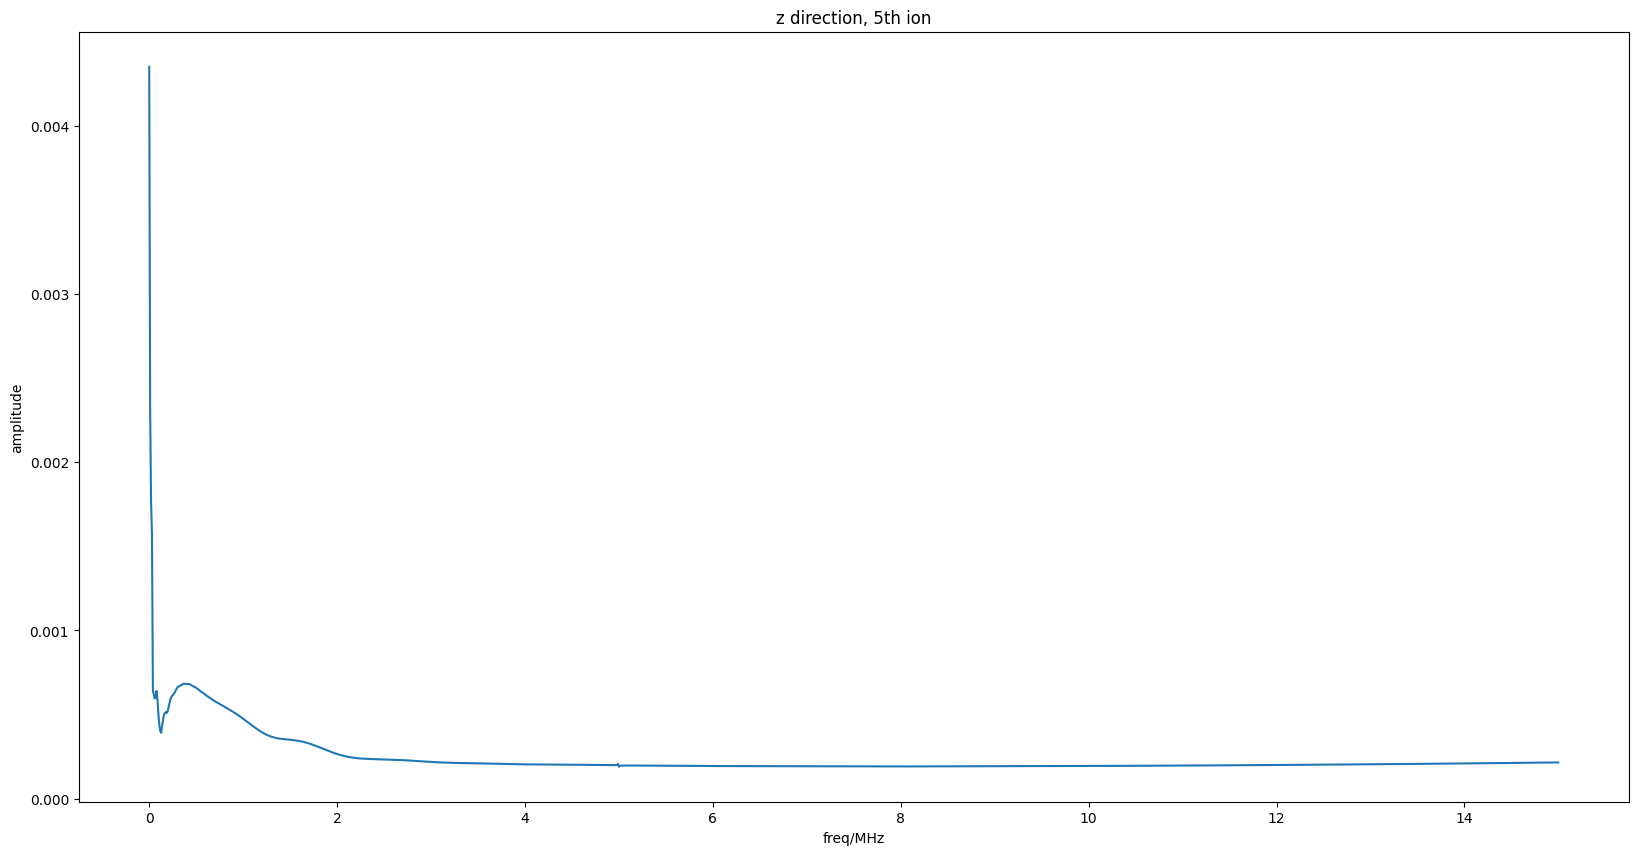

In [122]:
freq_segment(axis=2, ion_id=5, min_freq=0, max_freq=15)

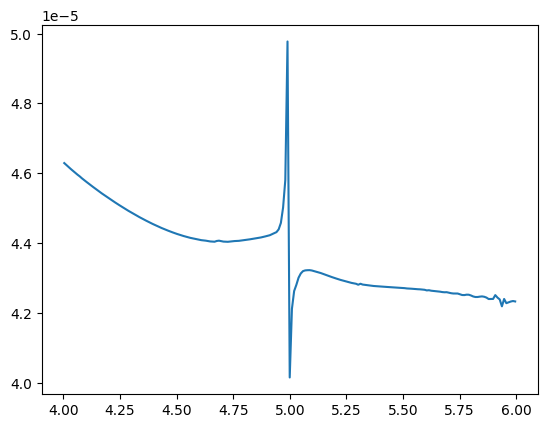

In [ ]:
freq_bound_low_min = 4
freq_bound_low_max = 6

freqs_low = freqs[np.where(freq_bound_low_max<freqs<freq_bound_low_max)]
magnitude_low = magnitude[np.where(freqs<freq_bound_low_max)]
plt.plot(freqs_low, magnitude_low)

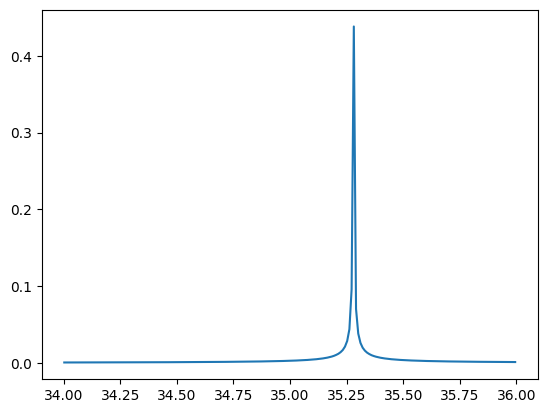

In [95]:
freq_bound_low_min = 34
freq_bound_low_max = 36

mask = (freqs > freq_bound_low_min) & (freqs < freq_bound_low_max)
freqs_low = freqs[mask]
magnitude_low = magnitude[mask]
plt.plot(freqs_low, magnitude_low)

In [94]:
Ni = 10000
v_rms = np.zeros(Ni)
for i in range(Ni):
    traj_r, traj_v = load_traj(i)
    for t in range(Nt):
        print(np.sum(traj_v**2, axis=1).shape)
        v_rms[i] = np.sqrt(np.mean(np.sum(traj_v**2, axis=1))) 

(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(11350,)
(

KeyboardInterrupt: 